# Importing the libraries

In [207]:
pip install folium

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium.plugins

# Data investigation

In [43]:
# uploading the table
df = pd.read_csv(r"C:\Users\buldu\Downloads\df_1_year.csv", index_col=0)
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member,2021,8,0.300000,2021-08-01 00:00:00
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.74,-87.53,member,2021,8,17.450000,2021-08-01 00:00:00
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,41.97,-87.71,member,2021,8,5.500000,2021-08-01 00:00:00
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,41.96,-87.71,member,2021,8,5.400000,2021-08-01 00:00:00
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,41.89,-87.65,member,2021,8,29.550000,2021-08-01 00:00:00


In [58]:
# checking the number of rows & columns
df.shape

(3235887, 17)

In [59]:
# Checking the name of columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Year', 'Month', 'ride_length', 'Year-Month'],
      dtype='object')

In [69]:
# Checking the type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235887 entries, 0 to 823487
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  Year                int64  
 14  Month               int64  
 15  ride_length         float64
 16  Year-Month          object 
dtypes: float64(5), int64(2), object(10)
memory usage: 444.4+ MB


For the analysis: we can remove "ride_id" (unique value id) that won't be necessary for analysis

Variables that can be analysed:
- Station names (start & end)
- rideable_type
- started_at & ended_at (hours of usage)
- Month
- ride_length

Variables that can be used has variables of split:
- rideable_type
- station_name (start & end)
- member_casual
- Year-Month, Month, started_at & ended_at (for hours)

In [61]:
# Checking if there are null values
print(pd.isnull(df).sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    505434
start_station_id      505432
end_station_name      540763
end_station_id        540763
start_lat                  0
start_lng                  0
end_lat                  218
end_lng                  218
member_casual              0
Year                       0
Month                      0
ride_length                0
Year-Month                 0
dtype: int64


Checking value count for possible split of data for analysis

In [62]:
df["rideable_type"].value_counts()

classic_bike     1663393
electric_bike    1483437
docked_bike        89057
Name: rideable_type, dtype: int64

3 types of bikes, although the last ones is only 2.75% of the data

In [44]:
df["start_station_name"].value_counts()

Streeter Dr & Grand Ave                          37925
Wells St & Concord Ln                            24393
DuSable Lake Shore Dr & North Blvd               23904
Clark St & Elm St                                21534
Wells St & Elm St                                20792
                                                 ...  
Al Raby School                                       1
Public Rack - Sawyer Ave & Bryn Mawr Ave - SW        1
Public Rack - Central Ave & North Ave                1
Calumet Ave & 103rd St                               1
Back of the Yards Park                               1
Name: start_station_name, Length: 1324, dtype: int64

In [45]:
df["end_station_name"].value_counts()

Streeter Dr & Grand Ave                     35661
DuSable Lake Shore Dr & North Blvd          26595
Wells St & Concord Ln                       25376
Clark St & Elm St                           21726
Michigan Ave & Oak St                       20557
                                            ...  
Morgan St & 103rd St                            1
Public Rack - Kedzie Ave & Arthington St        1
Whippie St & 26th St                            1
Tuley (Murray) Park                             1
May St & 78th St                                1
Name: end_station_name, Length: 1333, dtype: int64

1324 to 1333 stations available

In [46]:
# Checking the range of lattitude and longitude
print("(",min(df.start_lat),max(df.start_lat), ")")
print("(",min(df.start_lng),max(df.start_lng), ")")
print("(",min(df.end_lat),max(df.end_lat), ")")
print("(",min(df.end_lng),max(df.end_lng), ")")

( 41.64 42.07 )
( -87.84 -87.52 )
( 41.6 42.11 )
( -87.87 -87.5 )


This data min and max investigation on lattitude and longitude shows that this refers bike rides in Chicago area

In [47]:
df["member_casual"].value_counts()

member    1916317
casual    1319570
Name: member_casual, dtype: int64

2 types of users : members and casual users

In [48]:
df["Year"].value_counts()

2022    1697488
2021    1538399
Name: Year, dtype: int64

In [49]:
df["Month"].value_counts()

7     486749
8     468669
6     439719
9     429168
5     344221
10    341645
4     187188
11    180200
3     137412
12    118717
2      53909
1      48290
Name: Month, dtype: int64

In [67]:
pd.DataFrame(df["Year-Month"].value_counts())

,Year-Month
2022-07-01 00:00:00,486749
2021-08-01 00:00:00,468669
2022-06-01 00:00:00,439719
2021-09-01 00:00:00,429168
2022-05-01 00:00:00,344221
2021-10-01 00:00:00,341645
2022-04-01 00:00:00,187188
2021-11-01 00:00:00,180200
2022-03-01 00:00:00,137412
2021-12-01 00:00:00,118717


All the data are showing bikes for 1 rolling year

In [73]:
# transforming the date & hours, to datetime
df['started_at'] = pd.to_datetime(df['started_at'])


In [74]:
# extracting hours and minutes
df['started_at_hour'] = df['started_at'].dt.hour
df['started_at_minute'] = df['started_at'].dt.minute


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,started_at_hour_minute
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,17,15,17.0025
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,17,23,17.0038
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,2,34,2.0056
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,12,41,12.0068
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,12,21,12.0035
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member,2021,8,0.300000,2021-08-01 00:00:00,18,23,18.0038
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.74,-87.53,member,2021,8,17.450000,2021-08-01 00:00:00,12,50,12.0083
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,41.97,-87.71,member,2021,8,5.500000,2021-08-01 00:00:00,18,11,18.0018
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,41.96,-87.71,member,2021,8,5.400000,2021-08-01 00:00:00,18,26,18.0043
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,41.89,-87.65,member,2021,8,29.550000,2021-08-01 00:00:00,8,16,8.0026


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,17,15
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,17,23
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,2,34
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,12,41
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,12,21
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member,2021,8,0.300000,2021-08-01 00:00:00,18,23
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.74,-87.53,member,2021,8,17.450000,2021-08-01 00:00:00,12,50
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,41.97,-87.71,member,2021,8,5.500000,2021-08-01 00:00:00,18,11
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,41.96,-87.71,member,2021,8,5.400000,2021-08-01 00:00:00,18,26
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,41.89,-87.65,member,2021,8,29.550000,2021-08-01 00:00:00,8,16


In [77]:

# combining hour and minute
# 10:15 => will be 10n25, 10:20 will be 10,333
def combine_hour_minute(row):
    return float(row['started_at_hour']) + float(row['started_at_minute'] / 60)

df['started_at_hour_minute'] = df.apply(combine_hour_minute, axis=1)
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,started_at_hour_minute
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,17,15,17.250000
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,17,23,17.383333
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,2,34,2.566667
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,12,41,12.683333
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,12,21,12.350000
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member,2021,8,0.300000,2021-08-01 00:00:00,18,23,18.383333
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.74,-87.53,member,2021,8,17.450000,2021-08-01 00:00:00,12,50,12.833333
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,41.97,-87.71,member,2021,8,5.500000,2021-08-01 00:00:00,18,11,18.183333
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,41.96,-87.71,member,2021,8,5.400000,2021-08-01 00:00:00,18,26,18.433333
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,41.89,-87.65,member,2021,8,29.550000,2021-08-01 00:00:00,8,16,8.266667


In [79]:
df.drop(columns="ride_id", inplace=True)

In [80]:
df.head(5)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,started_at_hour_minute
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,17,15,17.250000
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,17,23,17.383333
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,2,34,2.566667
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,12,41,12.683333
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,12,21,12.350000


In [81]:
df.to_csv('bikes_ready_analysis.csv')

# Codes for producing chart - Library => Matplotlib

1. Bar chart of rides per month (+ associated with temperature or precipation ??)

In [94]:
# count number of rides, using a column not with NA
monthly_counts = df.groupby(df["Year-Month"]).count()['ride_length']
monthly_counts

Year-Month
2021-08-01 00:00:00    468669
2021-09-01 00:00:00    429168
2021-10-01 00:00:00    341645
2021-11-01 00:00:00    180200
2021-12-01 00:00:00    118717
2022-01-01 00:00:00     48290
2022-02-01 00:00:00     53909
2022-03-01 00:00:00    137412
2022-04-01 00:00:00    187188
2022-05-01 00:00:00    344221
2022-06-01 00:00:00    439719
2022-07-01 00:00:00    486749
Name: ride_length, dtype: int64

In [100]:
monthly_sum = df.groupby(['Year-Month']).sum()['ride_length']
monthly_sum

Year-Month
2021-08-01 00:00:00    6.491848e+06
2021-09-01 00:00:00    5.740153e+06
2021-10-01 00:00:00    4.149016e+06
2021-11-01 00:00:00    1.909980e+06
2021-12-01 00:00:00    1.248289e+06
2022-01-01 00:00:00    4.803357e+05
2022-02-01 00:00:00    5.461004e+05
2022-03-01 00:00:00    1.573029e+06
2022-04-01 00:00:00    2.138354e+06
2022-05-01 00:00:00    4.440346e+06
2022-06-01 00:00:00    5.765187e+06
2022-07-01 00:00:00    6.316221e+06
Name: ride_length, dtype: float64

In [96]:
monthly_counts.index

Index(['2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
       '2021-11-01 00:00:00', '2021-12-01 00:00:00', '2022-01-01 00:00:00',
       '2022-02-01 00:00:00', '2022-03-01 00:00:00', '2022-04-01 00:00:00',
       '2022-05-01 00:00:00', '2022-06-01 00:00:00', '2022-07-01 00:00:00'],
      dtype='object', name='Year-Month')

In [111]:
temp_mean = pd.DataFrame({'month': ['2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
       '2021-11-01 00:00:00', '2021-12-01 00:00:00', '2022-01-01 00:00:00',
       '2022-02-01 00:00:00', '2022-03-01 00:00:00', '2022-04-01 00:00:00',
       '2022-05-01 00:00:00', '2022-06-01 00:00:00', '2022-07-01 00:00:00'],
                   'temp': [23.9, 19.9, 12.9, 5.8, -0.3, -3.2, -1.2, 4.4, 10.5, 16.6, 22.2, 24.8]})
temp_mean
# Source Wikipedia English : https://en.wikipedia.org/wiki/Climate_of_Chicago
# temperature in °C 

,month,temp
0,2021-08-01 00:00:00,23.9
1,2021-09-01 00:00:00,19.9
2,2021-10-01 00:00:00,12.9
3,2021-11-01 00:00:00,5.8
4,2021-12-01 00:00:00,-0.3
5,2022-01-01 00:00:00,-3.2
6,2022-02-01 00:00:00,-1.2
7,2022-03-01 00:00:00,4.4
8,2022-04-01 00:00:00,10.5
9,2022-05-01 00:00:00,16.6


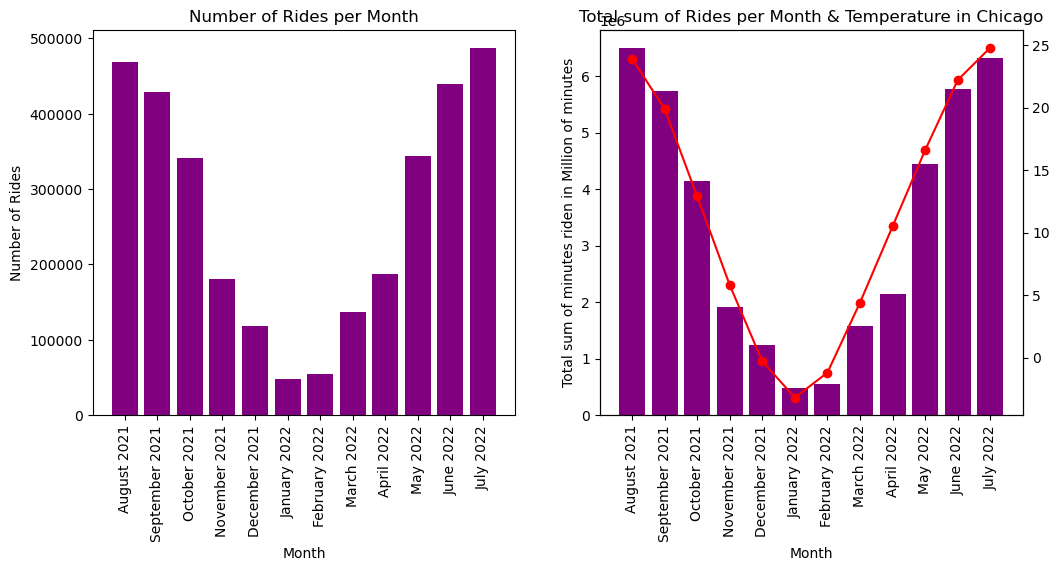

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(monthly_counts.index, monthly_counts.values, color="purple")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Number of Rides")
axs[0].set_title("Number of Rides per Month")

axs[1].bar(monthly_sum.index, monthly_sum.values, color="purple")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Total sum of minutes riden in Million of minutes")
axs[1].set_title("Total sum of Rides per Month & Temperature in Chicago")
temp_mean['temp'].plot(kind='line', marker="o", secondary_y=True, color='red')

month_list = ['August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022']
axs[0].set_xticks(monthly_counts.index, month_list, rotation=90)
axs[1].set_xticks(monthly_counts.index, month_list, rotation=90)

# Pie chart of bike type

In [129]:
bike_counts = df.groupby(df["rideable_type"]).count()['ride_length']
bike_counts

rideable_type
classic_bike     1663393
docked_bike        89057
electric_bike    1483437
Name: ride_length, dtype: int64

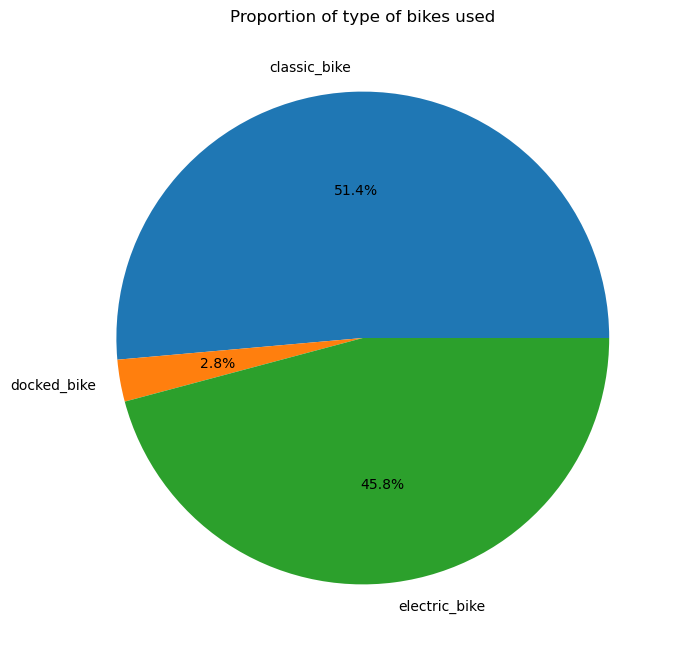

In [142]:
fig1, ax1 = plt.subplots(figsize=(8, 8))

ax1.pie(bike_counts.values, labels=bike_counts.index,autopct='%1.1f%%')
ax1.set_title('Proportion of type of bikes used')
ax1.set_label(['Classic','Docked','Electric'])


# Radar Plot of average ride duration by month  and bike type

C:\Users\buldu\AppData\Local\Temp\ipykernel_20788\3011024869.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\buldu\AppData\Local\Temp\ipykernel_20788\3011024869.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



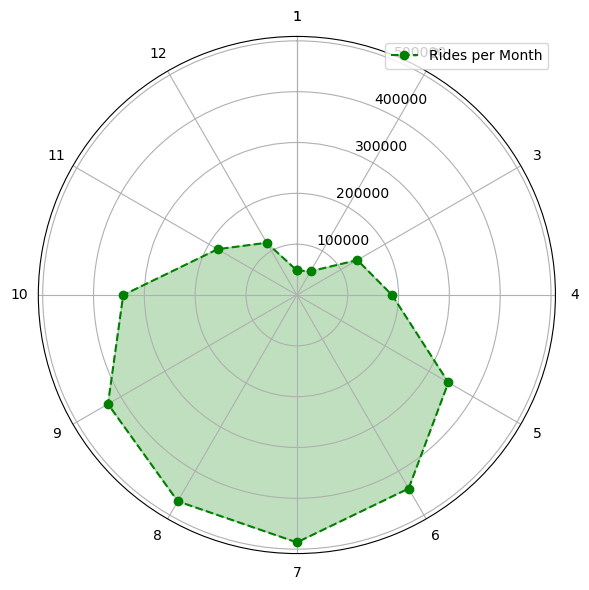

RangeIndex(start=0, stop=13, step=1)

In [274]:
# Radar Plot of average ride duration by month  and bike type
monthly_bikes = df['Month'].value_counts()
angles=np.linspace(0,2*np.pi,len(monthly_bikes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
monthly_bikes = pd.DataFrame(monthly_bikes.sort_index())
monthly_bikes.reset_index(inplace=True)
monthly_bikes = monthly_bikes.append({'Month':48289, 'index': 1}, ignore_index=True)
monthly_bikes = df['Month'].value_counts()
angles=np.linspace(0,2*np.pi,len(monthly_bikes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
monthly_bikes = pd.DataFrame(monthly_bikes.sort_index())
monthly_bikes.reset_index(inplace=True)
monthly_bikes = monthly_bikes.append({'Month':48289, 'index': 1}, ignore_index=True)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,monthly_bikes['Month'], 'o--', color='g', label='Rides per Month')
#fill plot
ax.fill(angles, monthly_bikes['Month'], alpha=0.25, color='g')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, monthly_bikes['index'])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

monthly_bikes.index


# Multiple Box Plot of duration by membership type and bike type

ConversionError: Failed to convert value(s) to axis units: ['2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00', '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00', '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00', '2022-07-01 00:00:00']

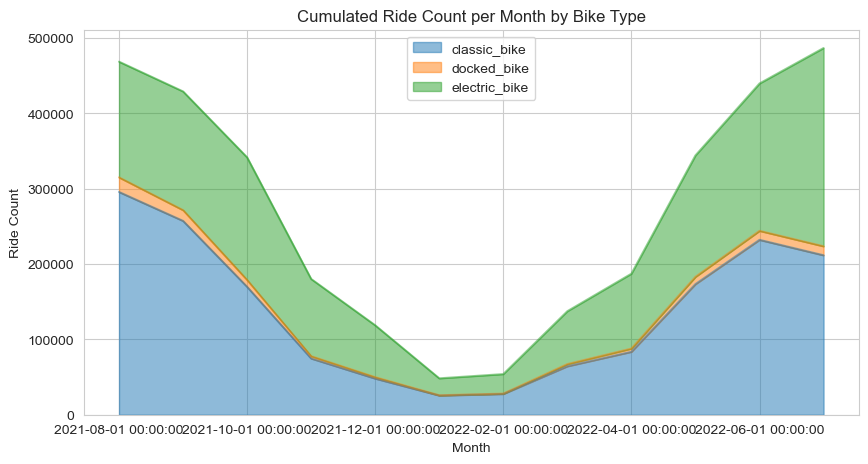

In [303]:
monthly_counts = df.groupby(["Year-Month", "rideable_type"]).count().reset_index()
monthly_counts = monthly_counts.pivot(index="Year-Month", columns="rideable_type", values="started_at")

ax = monthly_counts.plot.area(stacked=True, figsize=(10,5), alpha=0.5)

ax.set_xlabel("Month")
ax.set_ylabel("Ride Count")

ax.set_title("Cumulated Ride Count per Month by Bike Type")
plt.legend(loc='upper center')
ax.set_xticks(['2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00', '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00', '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00', '2022-07-01 00:00:00'], ['August','September','October','November','December','January','February','March','April', 'May','June','July'], rotation=90)
plt.show()

# 3D scatter plot ride length per bike type and per member_casual

In [173]:
from mpl_toolkits.mplot3d import Axes3D

fig4 = plt.figure()
ax4 = fig.add_subplot(111, projection='3d')

ax4.scatter(df["Month"], df["Year"], df["ride_length"],
            cmap="viridis")

ax4.set_xlabel("Month")

# Set the y-axis label
ax4.set_ylabel("Year")

# Set the z-axis label
ax4.set_zlabel("Ride Length")

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

# Line plot of hourly rides per bike type by month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


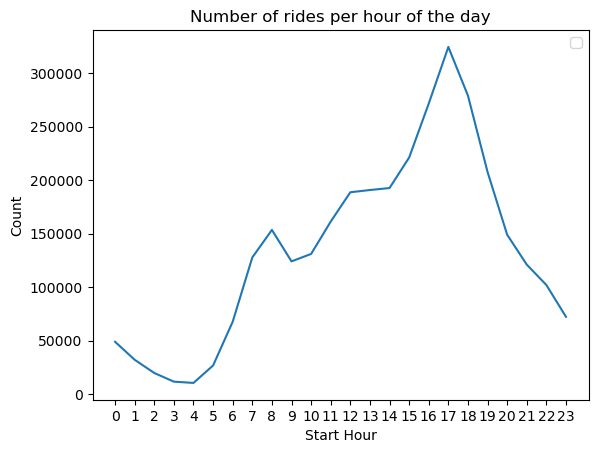

In [236]:
# Extract the hour and month from the start time

# Group the data by month and start hour, and calculate the count of rides
hourly_rides = df.groupby("started_at_hour").size().reset_index()
hourly_rides = hourly_rides.rename(columns={0: "Count"})

# Plot the data for each bike type
plt.plot(hourly_rides["started_at_hour"], hourly_rides["Count"])

x = np.arange(0, 24, 1)


plt.xlabel("Start Hour")
plt.xticks(x)
plt.ylabel("Count")
plt.legend()
plt.title("Number of rides per hour of the day")

plt.show()


# Scatter plot of ride length per time of hour for docked bike

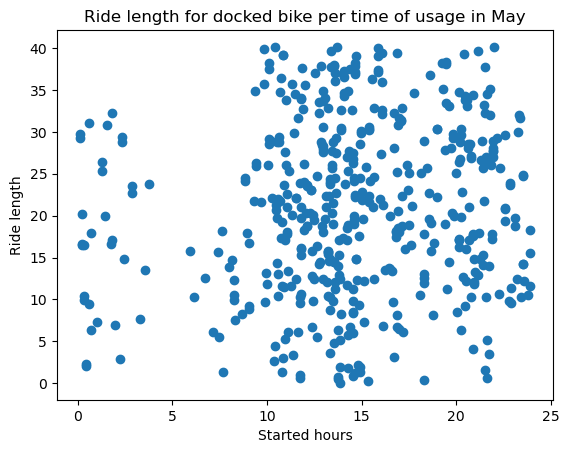

In [182]:
# because the full data was giving a chart full of points everywhere, we decided to filter this data on docked bike on the 4th of July, to make it more readable
docked_bike = df[df["rideable_type"] =="docked_bike"]
docked_bikes_indep = docked_bike[(docked_bike["started_at"].dt.month == 7) & (docked_bike["started_at"].dt.day == 4)]
docked_bikes_indep


plt.scatter(docked_bikes_indep["started_at_hour_minute"], docked_bikes_indep["ride_length"])
plt.xlabel("Started hours")
plt.ylabel("Ride length")
plt.title("Ride length for docked bike per time of usage in May")
plt.show()

# Multi-series Bar Plot of monthly rides by membership type

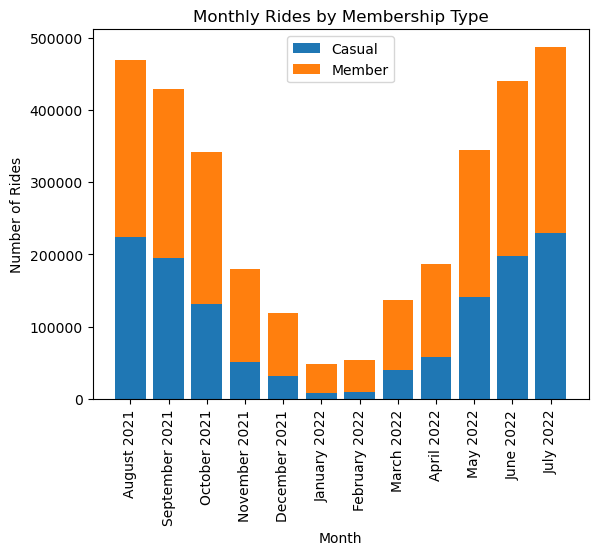

In [192]:
monthly_rides = df.groupby(["Year-Month", "member_casual"]).size().reset_index()
monthly_rides.columns = ["Year-Month", "member_casual", "count"]


fig5, ax5 = plt.subplots()

ax5.bar(monthly_rides[monthly_rides["member_casual"] == "casual"]["Year-Month"], 
       monthly_rides[monthly_rides["member_casual"] == "casual"]["count"],
       label="Casual")
ax5.bar(monthly_rides[monthly_rides["member_casual"] == "member"]["Year-Month"], 
       monthly_rides[monthly_rides["member_casual"] == "member"]["count"],
       label="Member",
       bottom=monthly_rides[monthly_rides["member_casual"] == "casual"]["count"])

ax5.set_xlabel("Month")
ax5.set_ylabel("Number of Rides")
ax5.set_title("Monthly Rides by Membership Type")
ax5.legend()
plt.xticks(monthly_counts.index, month_list, rotation=90)
plt.show()

# 2D heatmaps for docked bikes in 4th july

C:\Users\buldu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


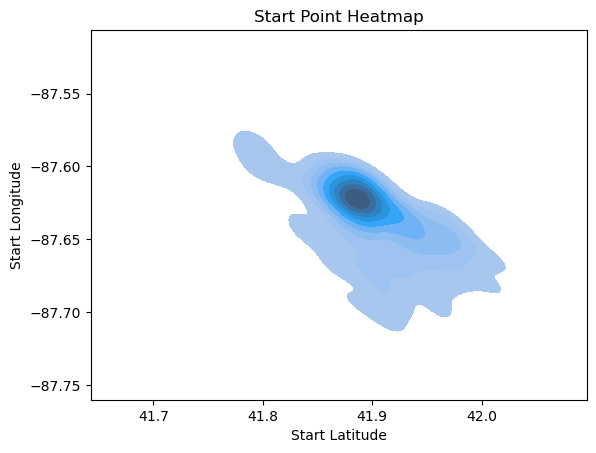

In [203]:

# 2D histogram of start latitude and longitude
sns.kdeplot(docked_bikes_indep["start_lat"], docked_bikes_indep["start_lng"], shade=True)



plt.xlabel("Start Latitude")
plt.ylabel("Start Longitude")
plt.title("Start Point Heatmap")

# because the full data was giving a chart full of points everywhere, we decided to filter this data on docked bike on the 4th of July, to make it more readable
docked_bike = df[df["rideable_type"] =="docked_bike"]
docked_bikes_indep = docked_bike[(docked_bike["started_at"].dt.month == 7) & (docked_bike["started_at"].dt.day == 4)]
docked_bikes_indep
plt.show()

In [212]:
# because the full data was giving a chart full of points everywhere, we decided to filter this data on docked bike on the 4th of July, to make it more readable
# docked_bike = df[df["rideable_type"] =="docked_bike"]
# docked_bikes_indep = docked_bike[(docked_bike["started_at"].dt.month == 7) & (docked_bike["started_at"].dt.day == 4)]
# docked_bikes_indep


lat_mean = docked_bikes_indep['start_lat'].mean()
lng_mean = docked_bikes_indep['start_lng'].mean()
m_start = folium.Map(location=[lat_mean, lng_mean], zoom_start=13)

start_points = docked_bikes_indep[['start_lat', 'start_lng']].dropna().astype(float)
start_points = start_points.rename(columns={'start_lat': 'latitude', 'start_lng': 'longitude'})

folium.plugins.HeatMap(start_points.values.tolist()).add_to(m_start)
m_start

In [213]:
lat_mean = docked_bikes_indep['end_lat'].mean()
lng_mean = docked_bikes_indep['end_lng'].mean()
m_end = folium.Map(location=[lat_mean, lng_mean], zoom_start=13)

start_points = docked_bikes_indep[['end_lat', 'start_lng']].dropna().astype(float)
start_points = start_points.rename(columns={'end_lat': 'latitude', 'start_lng': 'longitude'})

folium.plugins.HeatMap(start_points.values.tolist()).add_to(m_end)
m_end

Text(0, 0.5, 'Duration')

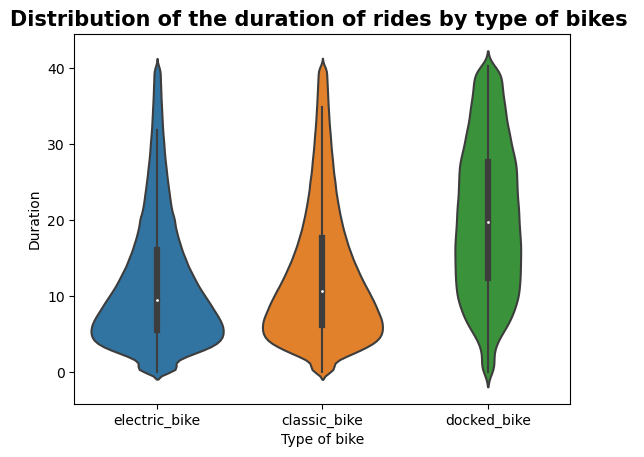

In [229]:
# copied from seaborn's codes file
sns.violinplot(x= 'rideable_type', y= 'ride_length', data= df)
plt.title('Distribution of the duration of rides by type of bikes ', size='15', fontweight='bold')
plt.xlabel("Type of bike")
plt.ylabel("Duration")

In [238]:
df.head(5)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,started_at_hour_minute
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,17,15,17.250000
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,17,23,17.383333
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,2,34,2.566667
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,12,41,12.683333
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,12,21,12.350000
